# Import data

In [2]:
#@title import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing

In [3]:
# read data from csv file
df = pd.read_csv("yellow_tripdata_2018-06.csv") 

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [5]:
df.shape

(8713831, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713831 entries, 0 to 8713830
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

# Part 1. Data Exploration

## 1.1 passenger_count
### (The number of passengers in the vehicle. This is a driver-entered value.)

In [7]:
df['passenger_count'].value_counts()

1    6203828
2    1273967
5     387890
3     362522
6     240939
4     173885
0      70722
9         29
7         27
8         22
Name: passenger_count, dtype: int64

In [7]:
# x --- passenger_count (which is the number of passengers)
# y --- count(passenger_count)
# sns.set_palette("pastel")
# plt.figure(figsize=(12,8))
# sns.countplot(x="passenger_count", data=df)
# plt.show()

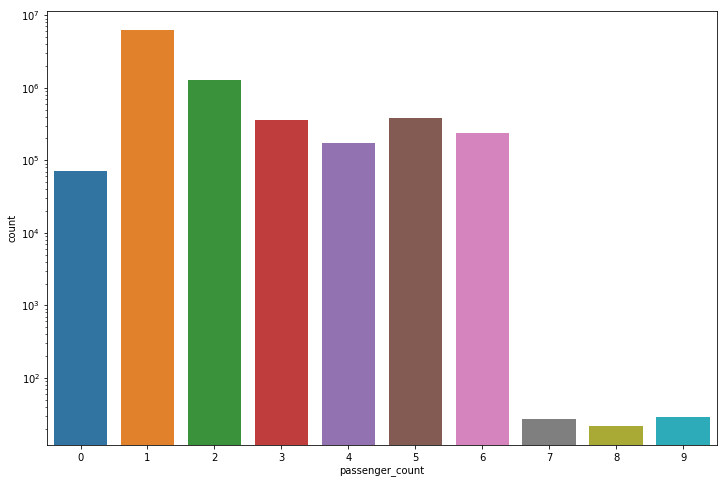

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="passenger_count", data=df, log=True)
plt.show()

# --------------------------------------------------------------------------------------------------------------

## 1.2 VendorID
### (A code indicating the TPEP provider that provided the record)
### (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc)

In [9]:
df['VendorID'].value_counts()

2    5012778
1    3699955
4       1098
Name: VendorID, dtype: int64

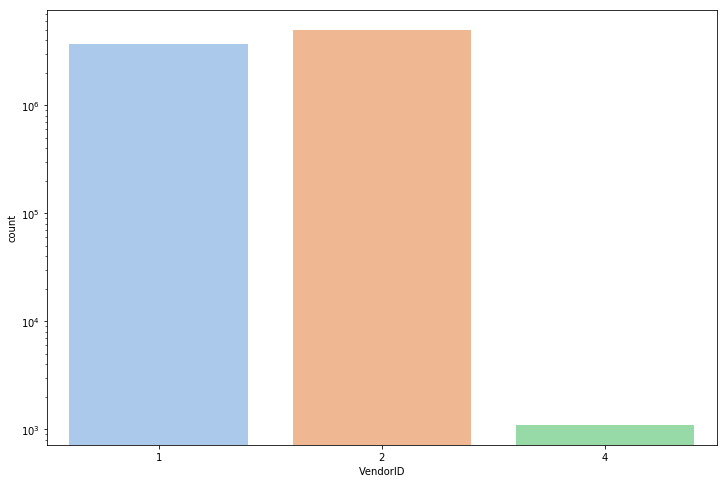

In [10]:
# x --- VendorID (which is supposed to have 1&2)
# y --- count(VendorID)
sns.set_palette("pastel")
plt.figure(figsize=(12,8))
sns.countplot(x="VendorID", data=df, log=True)
plt.show()


#### There should be only '1'&'2' two categories in the column according to the data_dictionary_trip_records_yellow.pdf file. 
#### However, there is another one '4' in the VendorID column.
#### My guess is that the pdf file of the data dictionary wasn't updated in time and there was another new TPEP provider came into play.

# --------------------------------------------------------------------------------------------------------------

## 1.3 store_and_fwd_flag
### (This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip / N= not a store and forward trip)

In [11]:
df['store_and_fwd_flag'].value_counts()

N    8682688
Y      31143
Name: store_and_fwd_flag, dtype: int64

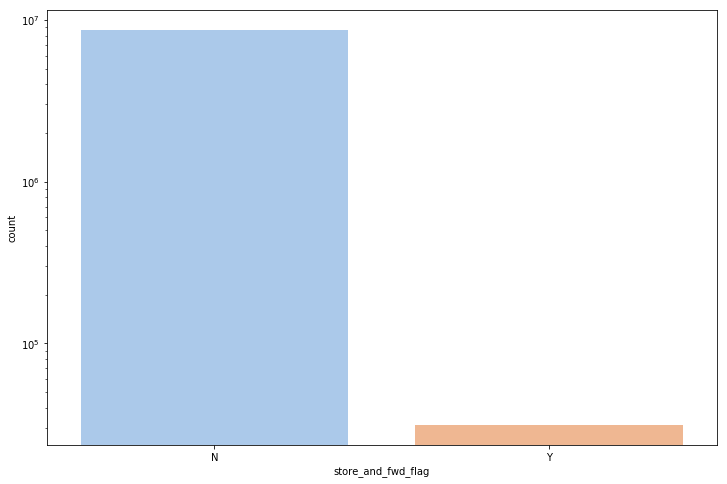

In [12]:
# x --- store_and_fwd_flag (which is supposed to have 'N' & 'Y')
# y --- count(store_and_fwd_flag)
sns.set_palette("pastel")
fig = plt.figure(figsize=(12,8))
sns.countplot(x="store_and_fwd_flag", data=df, log=True)
plt.show()

#### There is no outlier in this column.

# --------------------------------------------------------------------------------------------------------------

## 1.4 RatecodeID	
### (The final rate code in effect at the end of the trip. 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride)

In [13]:
df['RatecodeID'].value_counts()

1     8448152
2      211382
5       29629
3       18935
4        5504
99        159
6          70
Name: RatecodeID, dtype: int64

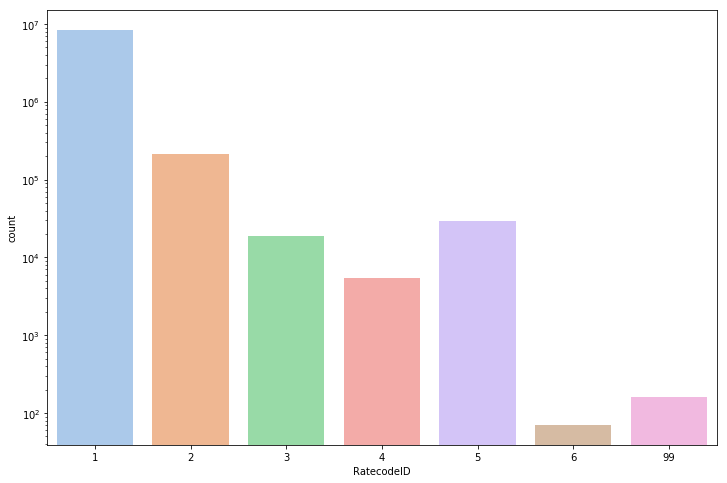

In [14]:
# x --- RatecodeID (which is supposed to be in 1-6)
# y --- count(RatecodeID)
sns.set_palette("pastel")
fig = plt.figure(figsize=(12,8))
sns.countplot(x="RatecodeID", data=df, log=True)
plt.show()

#### I found another kind of RatecodeID '99' which was not included in the description of the dataset, which would be considered as outlier.

# --------------------------------------------------------------------------------------------------------------

## 1.5 Day of the week
### (Monday/Tuesday/Wednesday/Thursday/Friday/Saturday/Sunday)

In [15]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_dropoff_datetime'] = pd.to_datetime(df.tpep_dropoff_datetime)

In [16]:
df["pickup_weekday_name"] = df.tpep_pickup_datetime.dt.weekday_name

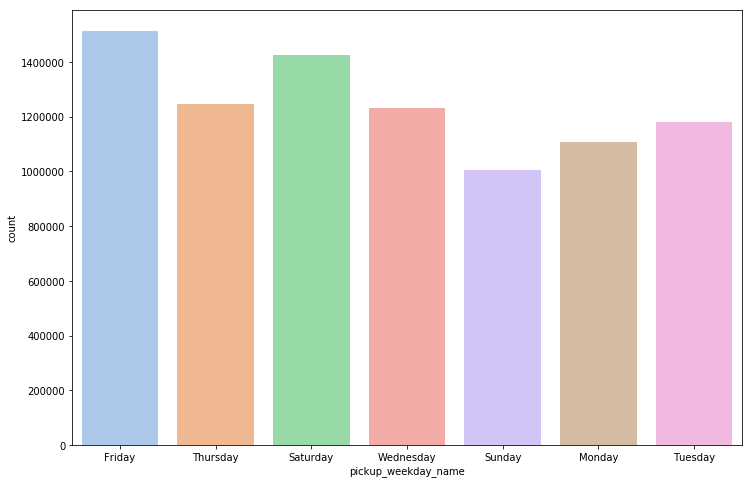

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df)
plt.show()

#### As can be seen from the plot, the usage of the yellow cab reached its peak on Friday followed by Saturday in June 2018.

# --------------------------------------------------------------------------------------------------------------

## 1.6 pickup/dropoff hour of the day (0-23)

In [18]:
df["pickup_hour"] = df.tpep_pickup_datetime.dt.hour
df["dropoff_hour"] = df.tpep_dropoff_datetime.dt.hour

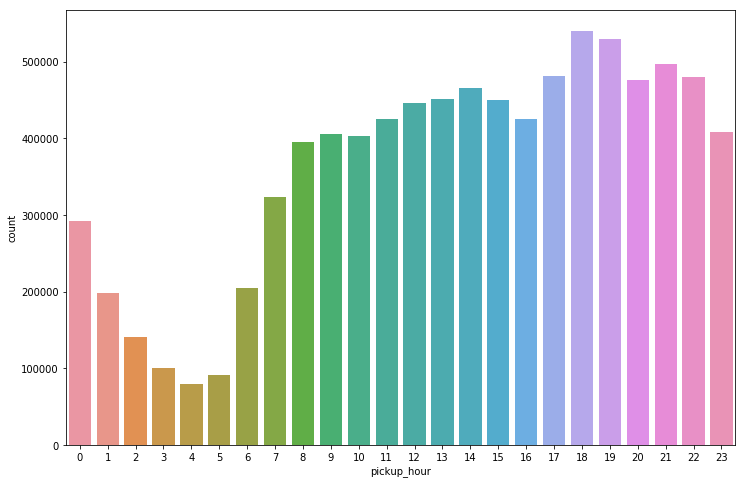

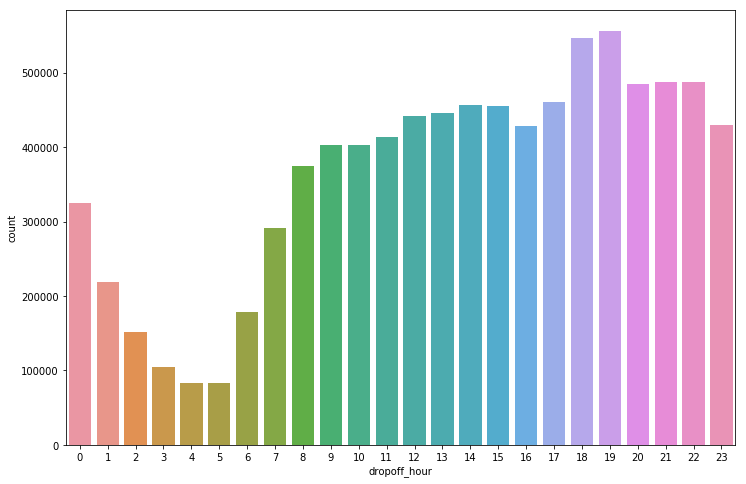

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_hour", data=df)
plt.show()
plt.figure(figsize=(12,8))
sns.countplot(x="dropoff_hour", data=df)
plt.show()

In [26]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.countplot(x="pickup_hour", data=df, ax=ax, facecolor=(0, 0, 0, 0), edgecolor=sns.color_palette("bright", 24))
# sns.countplot(x="dropoff_hour", data=df, ax=ax, facecolor=(0, 0, 0, 0), edgecolor="black")

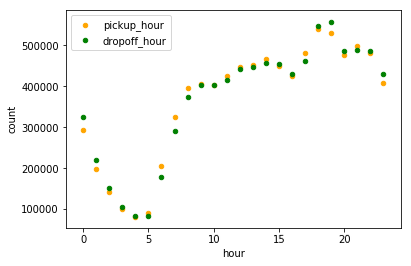

In [20]:
ax=df.groupby(['pickup_hour']).count().reset_index().plot.scatter(y='VendorID',x='pickup_hour',rot=1,color='orange',legend=True)
ax=df.groupby(['dropoff_hour']).count().reset_index().plot.scatter(rot=1,y='VendorID',x='dropoff_hour',ax=ax,color='green',legend=True)
ax.set_xlabel('hour')
ax.set_ylabel('count')
ax.legend(['pickup_hour','dropoff_hour'])

#### The picking up amount of the yellow cab reached its peak at 6 PM while the dropping off amount of the yellow cab reached its peak at 7 PM.

# --------------------------------------------------------------------------------------------------------------

## 1.7 trip_distance
### (The elapsed trip distance in miles reported by the taximeter)

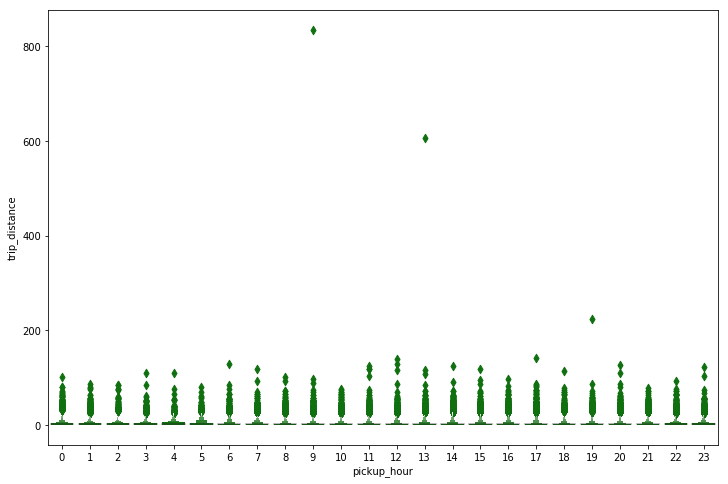

In [21]:
# x --- pickup_hour
# y --- trip_distance
sns.set_palette("pastel")
fig = plt.figure(figsize=(12,8))
#sns.catplot(x="pickup_hour",y='trip_distance',data=df)
sns.boxenplot(x="pickup_hour",y='trip_distance',data=df,color='green')
plt.show()

In [22]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_weekday_name,pickup_hour,dropoff_hour
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,Friday,0,0
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,Friday,0,0
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,Friday,0,0
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,Friday,0,0
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,Friday,0,0


In [23]:
print(df.describe(percentiles = [.1, .25, .5, .75, .95]))

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  8.713831e+06     8.713831e+06   8.713831e+06  8.713831e+06   
mean   1.575645e+00     1.597527e+00   3.008475e+00  1.045928e+00   
std    4.950090e-01     1.243872e+00   3.858110e+00  5.161131e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
10%    1.000000e+00     1.000000e+00   6.100000e-01  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.660000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   3.100000e+00  1.000000e+00   
95%    2.000000e+00     5.000000e+00   1.115000e+01  1.000000e+00   
max    4.000000e+00     9.000000e+00   8.331000e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  8.713831e+06  8.713831e+06  8.713831e+06  8.713831e+06  8.713831e+06   
mean   1.624701e+02  1.607770e+02  1.314139e+00  1.325420e+01  3.363939e-01   
std

### As can be seen from the plot image, most of the people would not travel far during rush hour, which was from 5 PM to 7 PM.

# --------------------------------------------------------------------------------------------------------------

## 1.8 trip_duration 
### Adding new column: 'trip_duration' 
### By calculating ---> (tpep_dropoff_datetime - tpep_pickup_datetime) in seconds

In [24]:
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()

In [25]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_weekday_name,pickup_hour,dropoff_hour,trip_duration
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,...,0.5,0.5,0.00,0.0,0.3,4.30,Friday,0,0,66.0
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,...,0.5,0.5,1.35,0.0,0.3,8.15,Friday,0,0,300.0
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,...,0.5,0.5,0.00,0.0,0.3,14.30,Friday,0,0,907.0
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,...,0.5,0.5,0.00,0.0,0.3,3.80,Friday,0,0,4.0
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,...,0.5,0.5,0.00,0.0,0.3,3.80,Friday,0,0,4.0


In [28]:
# plt.figure(figsize=(40,20))
# sns.catplot(x="pickup_weekday_name",y="trip_duration",data=df)
# plt.show()

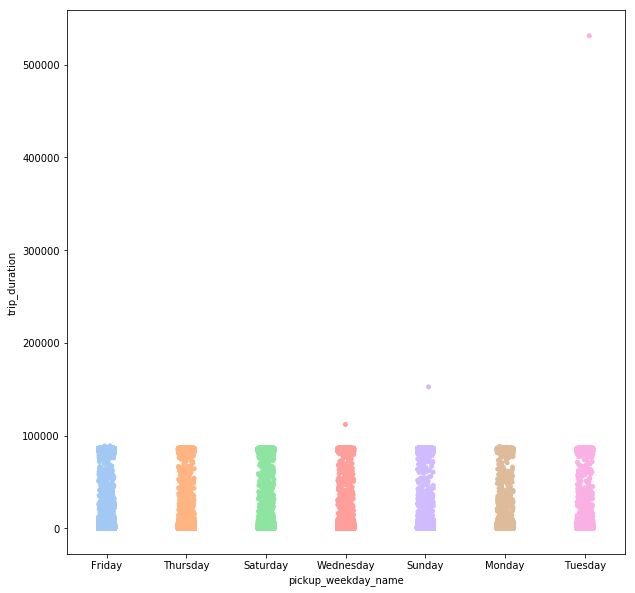

In [26]:
plt.figure(figsize=(10,10))
sns.stripplot(x="pickup_weekday_name",y="trip_duration",data=df)
plt.show()

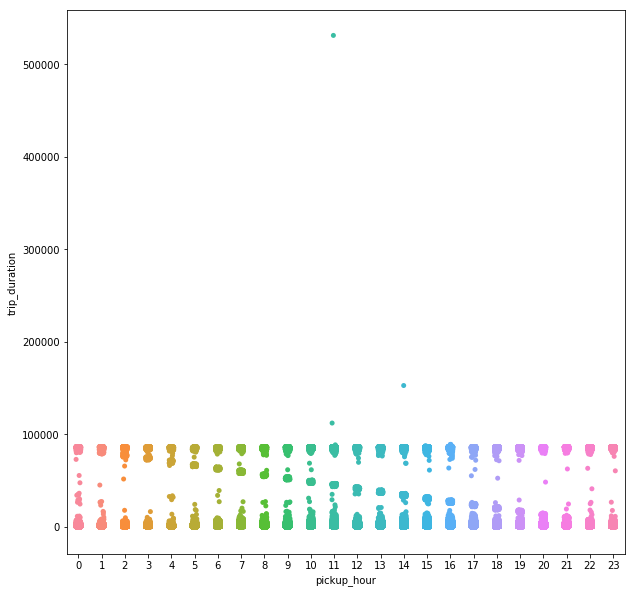

In [27]:
plt.figure(figsize=(10,10))
sns.stripplot(x="pickup_hour",y="trip_duration",data=df)
plt.show()

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------

# Part 2. Further Exploration & Feature Preprocessing

## 2.1 Extracting data
### within the targeted time period 'rush hour' (pickup time from 17:00:00 to 19:59:59)

In [28]:
df1 = df.loc[:,['pickup_weekday_name', 'pickup_hour', 'tpep_pickup_datetime','tpep_dropoff_datetime','trip_duration', 'PULocationID', 'DOLocationID','trip_distance', 'passenger_count']]

In [29]:
df1.shape

(8713831, 9)

In [30]:
df1.head()

,pickup_weekday_name,pickup_hour,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,PULocationID,DOLocationID,trip_distance,passenger_count
0,Friday,0,2018-06-01 00:15:40,2018-06-01 00:16:46,66.0,145,145,0.0,1
1,Friday,0,2018-06-01 00:04:18,2018-06-01 00:09:18,300.0,230,161,1.0,1
2,Friday,0,2018-06-01 00:14:39,2018-06-01 00:29:46,907.0,100,263,3.3,1
3,Friday,0,2018-06-01 00:51:25,2018-06-01 00:51:29,4.0,145,145,0.0,3
4,Friday,0,2018-06-01 00:55:06,2018-06-01 00:55:10,4.0,145,145,0.0,1


In [31]:
df1.dtypes

pickup_weekday_name              object
pickup_hour                       int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_duration                   float64
PULocationID                      int64
DOLocationID                      int64
trip_distance                   float64
passenger_count                   int64
dtype: object

In [32]:
print(df1.tpep_pickup_datetime.min())
print(df1.tpep_pickup_datetime.max())

2002-12-31 22:34:35
2019-04-28 17:07:42


### Notice : Data has some outliers which are not in June. I have to filter out the data which was not in June, 2018.

In [33]:
df1 = df1.query("datetime.datetime(2018,6,1,0,0,0) <= tpep_pickup_datetime < datetime.datetime(2018,7,1,0,0,0)")

In [34]:
print(df1.tpep_pickup_datetime.min())
print(df1.tpep_pickup_datetime.max())

2018-06-01 00:00:00
2018-06-30 23:59:59


### Filtering out the data which was not between the rush hour (pick up time from 17:00:00 to 19:59:59).

In [35]:
df1['pick_time'] = [d.time() for d in df1['tpep_pickup_datetime']]

df1 = df1.query("datetime.time(17,0,0) <= pick_time < datetime.time(20,0,0)")

In [36]:
print(df1.tpep_pickup_datetime.min())
print(df1.tpep_pickup_datetime.max())

2018-06-01 17:00:00
2018-06-30 19:59:59


In [37]:
df1 = df1.drop(['pick_time'],axis=1)
df1.head()

,pickup_weekday_name,pickup_hour,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,PULocationID,DOLocationID,trip_distance,passenger_count
149221,Friday,17,2018-06-01 17:00:40,2018-06-01 17:04:40,240.0,143,232,0.61,1
149222,Friday,17,2018-06-01 17:17:26,2018-06-01 17:22:54,328.0,107,4,1.16,2
149223,Friday,17,2018-06-01 17:28:20,2018-06-01 17:40:55,755.0,224,90,1.27,1
162775,Friday,18,2018-06-01 18:47:39,2018-06-01 18:50:38,179.0,264,264,0.00,1
176869,Friday,17,2018-06-01 17:00:46,2018-06-01 17:09:12,506.0,239,151,1.31,3


In [38]:
df1.tail()

,pickup_weekday_name,pickup_hour,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,PULocationID,DOLocationID,trip_distance,passenger_count
8707608,Saturday,18,2018-06-30 18:16:15,2018-06-30 18:26:07,592.0,249,234,1.63,1
8707609,Saturday,18,2018-06-30 18:34:27,2018-06-30 18:40:26,359.0,249,114,0.55,1
8707610,Saturday,19,2018-06-30 19:04:01,2018-06-30 19:10:08,367.0,164,113,1.12,1
8708519,Saturday,17,2018-06-30 17:32:15,2018-06-30 17:40:50,515.0,48,24,3.25,2
8708520,Saturday,18,2018-06-30 18:10:23,2018-07-01 17:16:38,83175.0,90,249,0.74,1


###  Correlation of the numerical features: trip_distance & trip_duration

               trip_distance  trip_duration
trip_distance       1.000000       0.183491
trip_duration       0.183491       1.000000


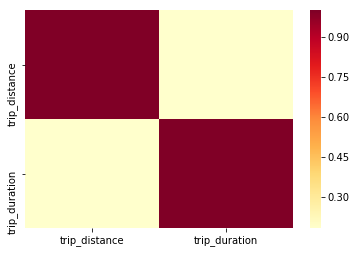

In [39]:
corr2 = df1[['trip_distance', 'trip_duration']].corr()
sns.heatmap(corr2, cmap='YlOrRd')
print(corr2)

### Day of the week & total amount of yellow taxi usage during the rush hours

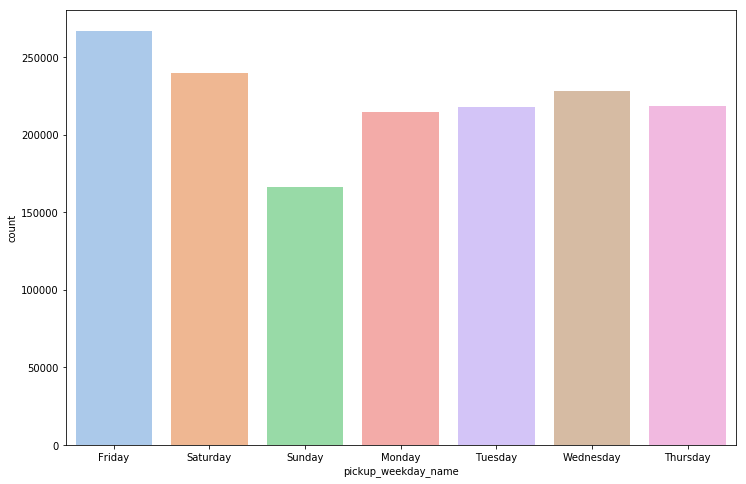

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df1)
plt.show()

#### Yellow taxi flow was at its highest on Fridays while the second highest was on Saturdays during rush hours.

# --------------------------------------------------------------------------------------------------------------

## 2.2 Check for outliers

### Pickup & dropoff loaction ID

In [41]:
print('Pickup location:',df1['PULocationID'].describe())
print(df1['PULocationID'].dtype)

print('Dropoff location:',df1['DOLocationID'].describe())
print(df1['DOLocationID'].dtype)

Pickup location: count    1.552533e+06
mean     1.656514e+02
std      6.545517e+01
min      1.000000e+00
25%      1.320000e+02
50%      1.620000e+02
75%      2.340000e+02
max      2.650000e+02
Name: PULocationID, dtype: float64
int64
Dropoff location: count    1.552533e+06
mean     1.634703e+02
std      7.079926e+01
min      1.000000e+00
25%      1.130000e+02
50%      1.620000e+02
75%      2.340000e+02
max      2.650000e+02
Name: DOLocationID, dtype: float64
int64


#### which means that there is no outlier in both the 'PULocationID' and 'DOLocationID' columns

### Passenger number (passenger_count)

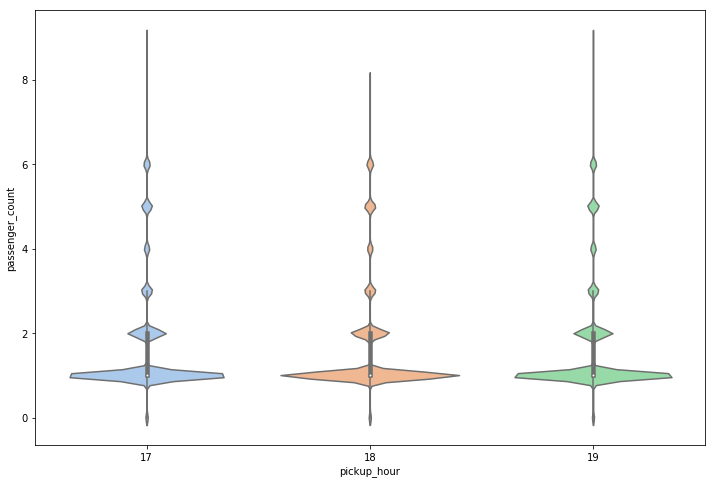

In [42]:
plt.figure(figsize=(12,8))
#sns.catplot(x="pickup_hour", y="passenger_count", data=df1)
sns.violinplot(x="pickup_hour", y="passenger_count", data=df1)
plt.show()

#### I notice that there are some outliers in the passenger_count column since normally the taxi won't be able to carry more than 4 passengers at the same time. 
#### However, there are some passenger numbers which are bigger than 4 and even 5. 
#### This might be a typo from the driver's side or some technical mistakes from the vendors. 
#### As long as it has nothing to do with my prediction model features (or one outlier in passenger_count doesn't mean that the whole piece of data is contaminated), I will just leave it there.

### Trip duration & weekday & pickup hour

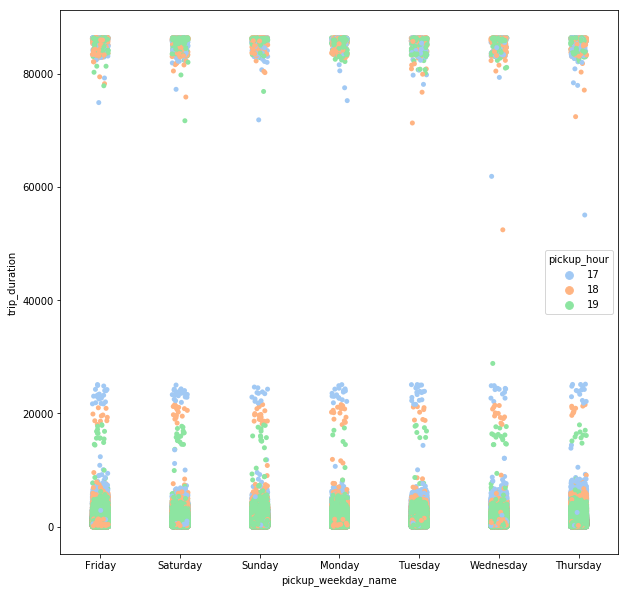

In [43]:
plt.figure(figsize=(10,10))
sns.stripplot(x="pickup_weekday_name",y="trip_duration",hue='pickup_hour',data=df1)
plt.show()

In [44]:
print("The longest trip duration in the datasat is:",df1["trip_duration"].max(),"seconds, which equals to", (df1["trip_duration"].max())/3600, "hours")
print("The shortest trip duration in the datasat is:",df1["trip_duration"].min(),"seconds")

The longest trip duration in the datasat is: 86399.0 seconds, which equals to 23.99972222222222 hours
The shortest trip duration in the datasat is: 0.0 seconds


In [45]:
df1["trip_duration"].describe()

count    1.552533e+06
mean     1.062792e+03
std      3.705111e+03
min      0.000000e+00
25%      4.120000e+02
50%      6.960000e+02
75%      1.142000e+03
max      8.639900e+04
Name: trip_duration, dtype: float64

In [46]:
len(df1.query("trip_duration==0.0"))

1074

In [47]:
df1.groupby('trip_duration').size().head()

trip_duration
0.0    1074
1.0     110
2.0     592
3.0     706
4.0     571
dtype: int64

### Trip distance & weekday & pickup hour

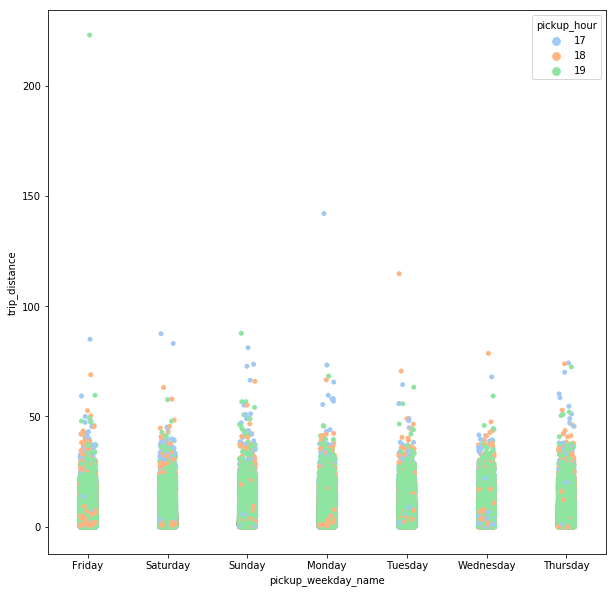

In [48]:
plt.figure(figsize=(10,10))
sns.stripplot(x="pickup_weekday_name",y="trip_distance",hue='pickup_hour',data=df1)
plt.show()

In [49]:
print("The longest trip distance in the datasat is:",df1["trip_distance"].max())
print("The shortest trip distance in the datasat is:",df1["trip_distance"].min())

The longest trip distance in the datasat is: 222.96
The shortest trip distance in the datasat is: 0.0


In [50]:
df1.groupby('trip_distance').size().head()

trip_distance
0.00    9493
0.01     565
0.02     430
0.03     342
0.04     245
dtype: int64

In [51]:
df1.query("trip_distance == 0").head()

,pickup_weekday_name,pickup_hour,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,PULocationID,DOLocationID,trip_distance,passenger_count
162775,Friday,18,2018-06-01 18:47:39,2018-06-01 18:50:38,179.0,264,264,0.0,1
181486,Friday,17,2018-06-01 17:00:04,2018-06-01 17:00:06,2.0,170,170,0.0,1
191426,Friday,17,2018-06-01 17:54:35,2018-06-01 17:57:31,176.0,145,145,0.0,1
191427,Friday,17,2018-06-01 17:43:47,2018-06-01 17:43:59,12.0,226,226,0.0,1
191428,Friday,17,2018-06-01 17:47:00,2018-06-01 17:47:11,11.0,226,226,0.0,1


In [52]:
df1.query("(trip_duration==0 & trip_distance!=0) | (trip_duration!=0 & trip_distance==0)").count()

pickup_weekday_name      8487
pickup_hour              8487
tpep_pickup_datetime     8487
tpep_dropoff_datetime    8487
trip_duration            8487
PULocationID             8487
DOLocationID             8487
trip_distance            8487
passenger_count          8487
dtype: int64

#### I found some data either has trip duration but with no trip distance or has trip distance but no trip duration.

# --------------------------------------------------------------------------------------------------------------

## 2.3 Extreme trip circumstances:
#### Case 1. trip duration longer than 22 hours ---> removed
#### Case 2. trip duration longer than 60 seconds, but trip distance is 0 ---> removed
#### Case 3. trip duration is 0, but trip distance is not 0 ---> removed
#### Case 4. trip duration is 0 and trip distance is 0 ---> keeped ***

#### Notice : The goal is to predict trip duration by pickup location, dropoff location and weekday

In [53]:
# 1. trip duration longer than 22 hours = 22*60*60 = 79200 seconds---> removed
df1 = df1.drop(df1[df1.trip_duration > 79200].index)

In [54]:
df1.shape

(1549691, 9)

In [55]:
# 2. trip duration longer than 60 seconds, but trip distance is 0 ---> removed
df1 = df1.drop(df1[(df1.trip_duration > 60) & (df1.trip_distance == 0)].index)

In [56]:
df1.shape

(1547793, 9)

In [57]:
# 3. trip duration is 0, but trip distance is not 0 ---> removed
df1 = df1.drop(df1[(df1.trip_duration == 0) & (df1.trip_distance != 0)].index)

In [58]:
df1.shape

(1547759, 9)

In [59]:
df1.head()

,pickup_weekday_name,pickup_hour,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,PULocationID,DOLocationID,trip_distance,passenger_count
149221,Friday,17,2018-06-01 17:00:40,2018-06-01 17:04:40,240.0,143,232,0.61,1
149222,Friday,17,2018-06-01 17:17:26,2018-06-01 17:22:54,328.0,107,4,1.16,2
149223,Friday,17,2018-06-01 17:28:20,2018-06-01 17:40:55,755.0,224,90,1.27,1
176869,Friday,17,2018-06-01 17:00:46,2018-06-01 17:09:12,506.0,239,151,1.31,3
176898,Friday,17,2018-06-01 17:02:14,2018-06-01 17:06:18,244.0,142,239,0.54,2


In [60]:
# drop all the columns that will not be used in my prediction model
df_rushhour = df1.drop(['pickup_hour', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'passenger_count'],axis=1)

In [61]:
df_rushhour.head()

,pickup_weekday_name,trip_duration,PULocationID,DOLocationID
149221,Friday,240.0,143,232
149222,Friday,328.0,107,4
149223,Friday,755.0,224,90
176869,Friday,506.0,239,151
176898,Friday,244.0,142,239


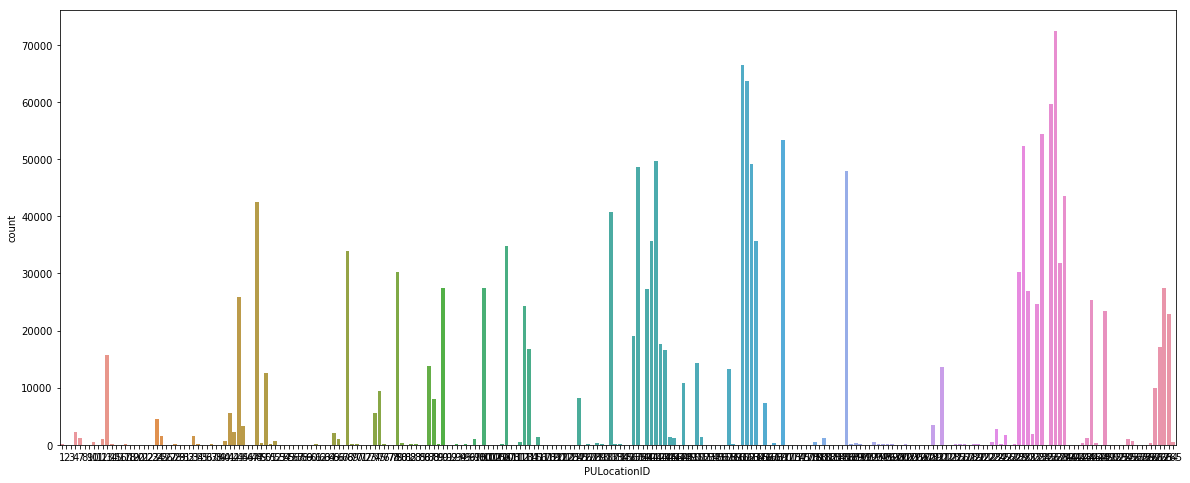

In [62]:
plt.figure(figsize=(20,8))
sns.countplot(x="PULocationID", data=df_rushhour)
plt.show()

In [63]:
print("The top 5 most popular pick-up location ID is:")
df_rushhour['PULocationID'].value_counts().head()

The top 5 most popular pick-up location ID is:


237    72517
161    66420
162    63687
236    59589
234    54371
Name: PULocationID, dtype: int64

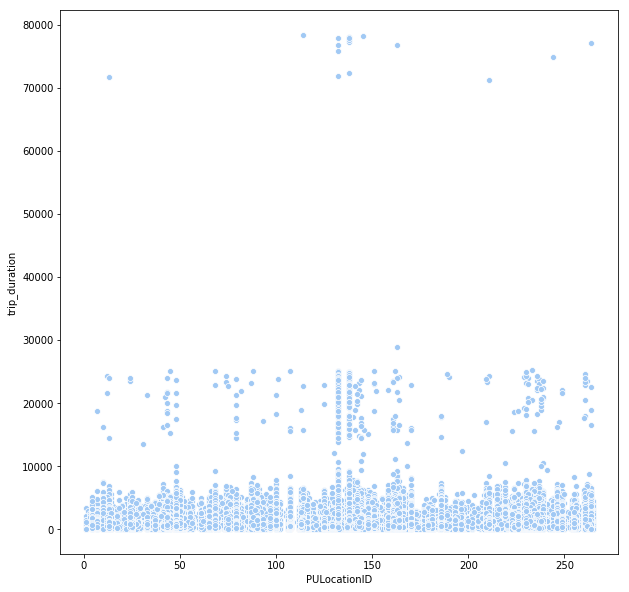

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PULocationID",y="trip_duration",data=df_rushhour)
plt.show()

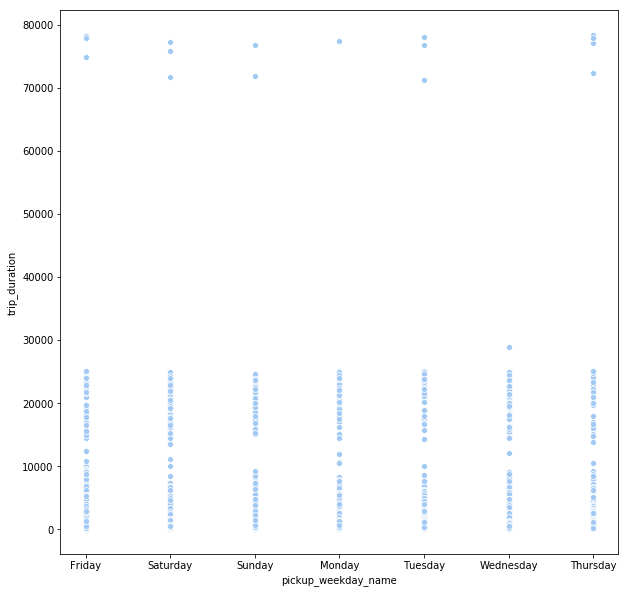

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pickup_weekday_name",y="trip_duration",data=df_rushhour)
plt.show()

# --------------------------------------------------------------------------------------------------------------

## 2.4 Feature Preprocessing

### Use One-Hot encoding on categorical features

#### There are 3 categorical features: pickup_weekday_name, PULocationID and DOLocationID.
#### pickup_weekday_name: has 7 sub-types, they can be easily converted to dummies.
#### PULocationID: 1-265 different location IDs (only 246 of them appeared in the targeted dataset)
#### DOLocationID: 1-265 different location IDs (only 261 of them appeared in the targeted dataset)

In [66]:
weekday = pd.get_dummies(df_rushhour.pickup_weekday_name).astype(np.int64)
pickup = pd.get_dummies(df_rushhour.PULocationID).astype(np.int64)
dropoff= pd.get_dummies(df_rushhour.DOLocationID).astype(np.int64)

In [67]:
print(weekday.head(5))
print(pickup.head(5))
print(dropoff.head(5))

        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
149221       1       0         0       0         0        0          0
149222       1       0         0       0         0        0          0
149223       1       0         0       0         0        0          0
176869       1       0         0       0         0        0          0
176898       1       0         0       0         0        0          0
        1    2    3    4    7    8    9    10   11   12   ...  256  257  258  \
149221    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
149222    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
149223    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
176869    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
176898    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        259  260  261  262  263  264  265  
149221    0    0    0    0    0    0    0  
14922

In [68]:
# new dataframe
# drop the previous categorical features, add new dummy variables
df_rushhour_temp = df_rushhour.drop(['pickup_weekday_name', 'PULocationID', 'DOLocationID'], axis=1)
df_rushhour_new = pd.concat([df_rushhour_temp, weekday, pickup, dropoff], axis=1)
print(df_rushhour_new.shape)
print(df_rushhour_new.head())
df_rushhour_0 = df_rushhour_new.copy() # a copy of df_rushhour_new

(1547759, 515)
        trip_duration  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
149221          240.0       1       0         0       0         0        0   
149222          328.0       1       0         0       0         0        0   
149223          755.0       1       0         0       0         0        0   
176869          506.0       1       0         0       0         0        0   
176898          244.0       1       0         0       0         0        0   

        Wednesday  1  2  ...  256  257  258  259  260  261  262  263  264  265  
149221          0  0  0  ...    0    0    0    0    0    0    0    0    0    0  
149222          0  0  0  ...    0    0    0    0    0    0    0    0    0    0  
149223          0  0  0  ...    0    0    0    0    0    0    0    0    0    0  
176869          0  0  0  ...    0    0    0    0    0    0    0    0    0    0  
176898          0  0  0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 515 columns]


In [69]:
df_rushhour_0.head()

,trip_duration,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,...,256,257,258,259,260,261,262,263,264,265
149221,240.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149222,328.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149223,755.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176869,506.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176898,244.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now the data is prepared for model training.